### **Load and Test-Train Split the Data**

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **Train data with SGDClassifier**

In [2]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


### **Scale Data with StandardScaler**

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

---

### Step 1: Generate Predictions Using Cross-Validation

Before evaluating errors, get predictions on the training data using cross_val_predict. This gives a fair estimate of model performance without overfitting.

> **Expected:** `y_train_pred` will be an array of predicted digit labels (0–9), matching the length of `y_train`.

In [4]:
from sklearn.model_selection import cross_val_predict

# Get predicted labels using 3-fold cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

### Step 2: Display the Raw Confusion Matrix
Now use `ConfusionMatrixDisplay` to show the basic confusion matrix, which compares actual vs. predicted labels.
> What to look for: The **main diagonal** (top-left to bottom-right) shows correct predictions. Off-diagonal cells show misclassifications (e.g., 3 predicted as 5).

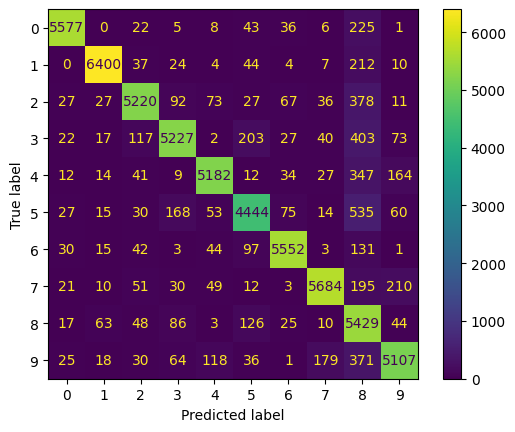

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

### Step 3: Normalize the Confusion Matrix by True Labels (Rows)
This reveals the percentage of each class that is correctly or incorrectly classified.

**Expected insights:**

- If row 5 shows 82% on the diagonal, it means 82% of 5s were correctly predicted.
- If 10% of 5s are predicted as 8s, we’ve identified a common mistake.

This helps understand **recall** per class.

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred,
    normalize="true",      # Normalize by row (true label)
    values_format=".0%"    # Show whole-number percentages
)
plt.show()

### Step 4: Emphasize Errors Only
To better see only the mistakes, zero out correct predictions using sample weights.
    
**Expected effect:**

- This will **dim the diagonal** and highlight errors.
- We see clearer patterns like "most errors in class 3 are being predicted as 5."

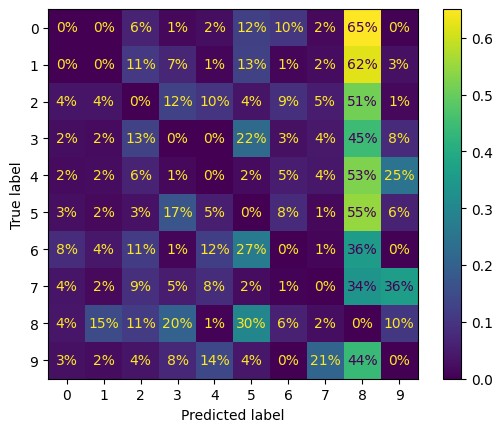

In [7]:
sample_weight = (y_train_pred != y_train)

ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred,
    sample_weight=sample_weight,  # Give weight only to misclassifications
    normalize="true",
    values_format=".0%"
)
plt.show()

### Step 5: Normalize by Prediction (Columns) to Analyze Precision
This view helps understand what each predicted label actually represents.

**Why it matters:**

- This shows **how accurate each predicted class is** (precision).
- If 80% of predicted 3s are actually 3s, that's solid.
- But if only 50% of predicted 8s are truly 8s, it means the classifier is confusing many digits as 8s.

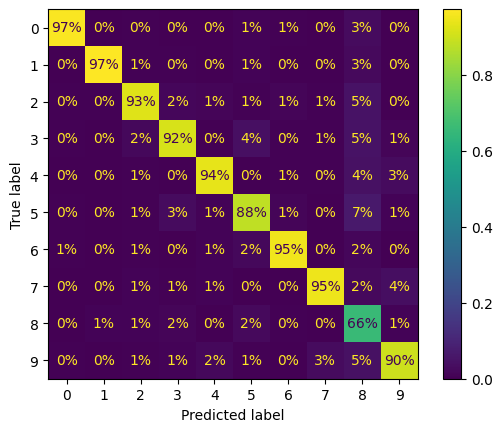

In [8]:
ConfusionMatrixDisplay.from_predictions(
    y_train,
    y_train_pred,
    normalize="pred",  # Normalize by predicted label
    values_format=".0%"
)
plt.show()

### Step 6: Visualize Specific Confusions (e.g., 3s and 5s)
This helps qualitatively understand what mistakes look like. We’ll plot a grid of correctly and incorrectly classified images.

In [9]:
cl_a, cl_b = '3', '5'

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]  # True 3s predicted as 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]  # True 3s predicted as 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]  # True 5s predicted as 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]  # True 5s predicted as 5

Then display them using matplotlib (optional but useful for visual intuition). You may use a helper function like:

In [12]:
def plot_digits(images, images_per_row=10):
    images = [image.reshape(28, 28) for image in images]
    n_images = len(images)
    n_rows = (n_images - 1) // images_per_row + 1

    # Pad the list with blank images if not a multiple of images_per_row
    n_missing = n_rows * images_per_row - n_images
    if n_missing > 0:
        blank_image = np.zeros((28, 28))
        images += [blank_image] * n_missing

    row_images = []
    for row in range(n_rows):
        row_images.append(
            np.concatenate(images[row * images_per_row:(row + 1) * images_per_row], axis=1)
        )
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

**Plot misclassifications:**
> **Goal:** See what kind of 3s look like 5s to the model (or vice versa). Sometimes it's due to poor handwriting, and sometimes due to model limitations (e.g., linear classifiers not capturing curves well).

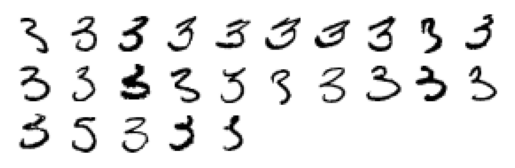

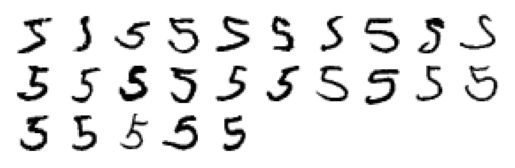

In [13]:
# Misclassified 3s as 5s
plot_digits(X_ab[:25])  

# Misclassified 5s as 3s
plot_digits(X_ba[:25])